# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [1]:
candidateno=262932 #this MUST be updated to your candidate number so that you get a unique data sample


In [2]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [3]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [4]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['rated', ':', 'r', 'for', 'strong', 'language', ',', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [5]:
stop_words = set(stopwords.words('english'))
positive_reviews = [words for words, label in training_data if label == 'pos']
positive_wordlist = [word for review in positive_reviews for word in review] #filters the words and puts them into world list

def normalise(wordlist):
    lowered=[word.lower() for word in wordlist] # turns all letters into lower case
    filtered=[word for word in lowered if word.isalpha() and word not in stop_words] # filters out all not alphabetical words
    return filtered


filtered_words = normalise(positive_wordlist) # calls the normalise function on the positive word list
positive_word_freq = nltk.FreqDist(filtered_words)
positive_content_words = positive_word_freq.most_common(10) #get the top 10 most frequent words
print(positive_content_words)






[('film', 3721), ('one', 2173), ('movie', 1763), ('like', 1255), ('story', 895), ('good', 886), ('time', 850), ('also', 842), ('even', 825), ('well', 813)]


In [6]:

negative_reviews = [words for words, label in training_data if label == 'neg']
negative_wordlist = [word for review in negative_reviews for word in review]

normalized_negative_words = normalise(negative_wordlist)
negative_word_freq = nltk.FreqDist(normalized_negative_words)
negative_content_words = negative_word_freq.most_common(10)
print(negative_content_words)

[('film', 2904), ('movie', 2333), ('one', 1965), ('like', 1322), ('even', 1003), ('good', 818), ('time', 807), ('would', 786), ('bad', 768), ('get', 731)]


The same method was used to get both lists of negative and positive reviews, which starts by filtering the postiive and negative words into seperate lits, which are then filtered using the normalise function which removes all non alphabetical words and stop words. nltk frequency distrubuter is then used to get the most common words, depending on ammount of times they are found in the word list

*2*)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [7]:
from nltk.classify.api import ClassifierI

class SimpleClassifier(ClassifierI):
    def __init__(self, pos, neg):
        self._pos = set(pos)  # put positive words into a set for faster lookup
        self._neg = set(neg)  # put negative words into a set for faster lookup

    def train(self, training_data):
        pass #this is not used here since training data is not used

    def classify(self, words): # score is used by calculating negative and positive words occurrences
        score = sum(1 if word in self._pos else -1 if word in self._neg else 0 for word in words)


        return "pos" if score > 0 else "neg"

    def labels(self):
        return ("pos", "neg")


classifier = SimpleClassifier(positive_content_words, negative_content_words)
classification = classifier.classify("this film was bad".split()) #sample output
print("Classification:", classification)



Classification: neg


the word list classifier uses the lists generated in question one to classify reviews based on the frequency of the words used in the review comparing them to the frequencies of the words mostly used in positive and negative reviews, which returns a tuple being either positive or negative

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [8]:
class ConfusionMatrix:
    def __init__(self, predictions, goldstandard, classes=("pos", "neg")):
        (self.c1, self.c2) = classes
        self.TP = self.FP = self.FN = self.TN = 0
        for p, g in zip(predictions, goldstandard): #looks through labels to create matrix values
            if g == self.c1:
                if p == self.c1:
                    self.TP += 1
                else:
                    self.FN += 1
            elif p == self.c1:
                self.FP += 1
            else:
                self.TN += 1

#defining the precision, recall, and f1 calculators using their equations
    def precision(self):
        return self.TP / (self.TP + self.FP) if (self.TP + self.FP) > 0 else 0

    def recall(self):
        return self.TP / (self.TP + self.FN) if (self.TP + self.FN) > 0 else 0

    def f1(self):
        p = self.precision()
        r = self.recall()
        return 2 * ((p * r) / (p + r)) if (p + r) > 0 else 0


def classifier_evaluate(cls, testing_data):
    docs, goldstandard = zip(*testing_data)
    predictions = [cls.classify(doc) for doc in docs]

    # Calculate metrics using ConfusionMatrix
    cm = ConfusionMatrix(predictions, goldstandard)
    accuracy = (cm.TP + cm.TN) / (cm.TP + cm.FP + cm.TN + cm.FN)
    precision = cm.precision()
    recall = cm.recall()
    f1_score = cm.f1()

    return accuracy, precision, recall, f1_score

accuracy, precision, recall, f1_score = classifier_evaluate(classifier, training_data)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.5
Precision: 0
Recall: 0.0
F1 Score: 0


it is shown that the accuracy turns out to be 50% which means that it will predict half of the instances making it a poor classifier, which could be due to the datasets that we used, where the lists were not helpful enough for the classifier to learn appropriate patterns

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [9]:
from nltk import NaiveBayesClassifier



all_words = [word.lower() for word in movie_reviews.words()] #all the words are put into one list
all_words_freq = nltk.FreqDist(all_words)


word_features = list(all_words_freq.keys())[:2000] # the top 2000 words are used as features

def document_features(document):
    document_words = set(document)
    features = {word: (word in document_words) for word in word_features}
    return features


training_set = [(document_features(d), c) for (d, c) in training_data]
testing_set = [(document_features(d), c) for (d, c) in testing_data]

# use the classifier on training
nbclassifier = NaiveBayesClassifier.train(training_set)

# test the classifier on the test set
accuracy, precision, recall, f1_score = classifier_evaluate(nbclassifier, testing_set)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)



Accuracy: 0.7916666666666666
Precision: 0.8070175438596491
Recall: 0.7666666666666667
F1 Score: 0.7863247863247863


the Naive Bayes classifiers metrics are all significantly higher, which means it has a better chance at predicting instances and correctly classify them as positive or negative. This means that the Naive classifier preforms better

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


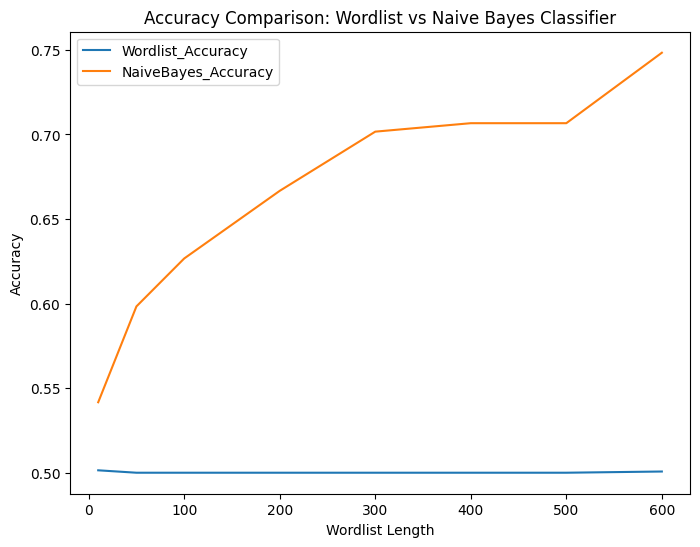

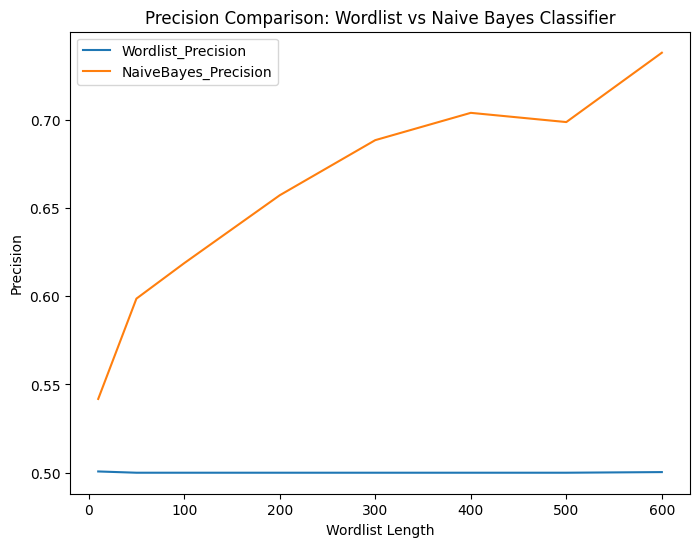

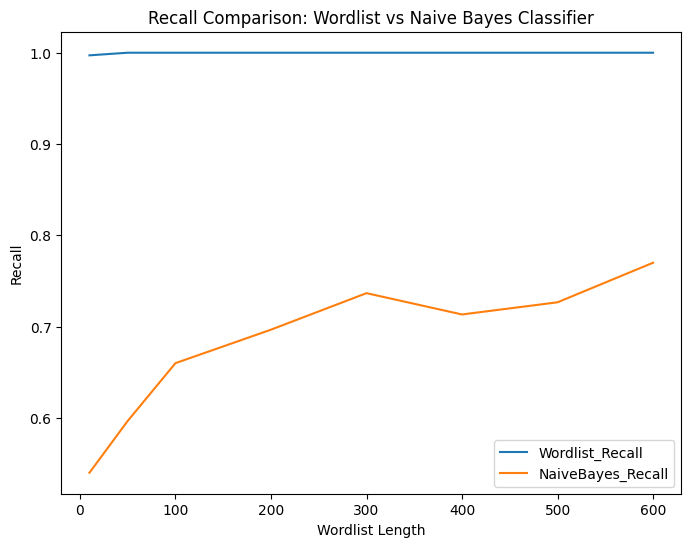

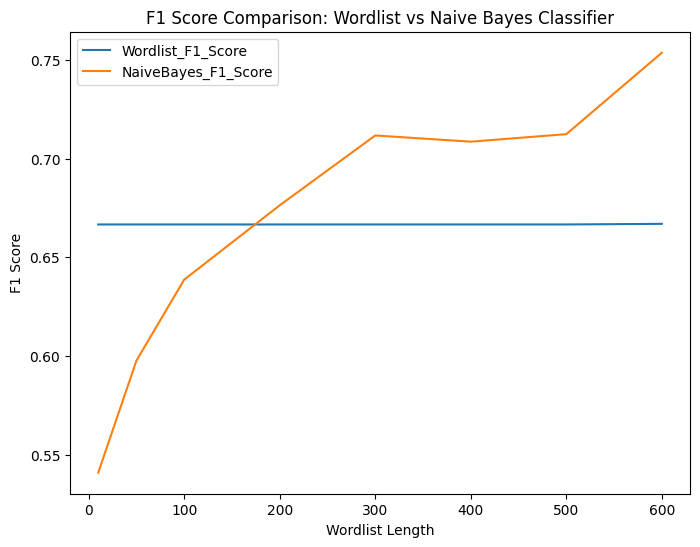

In [10]:
wordlist_lengths = [10, 50, 100, 200, 300, 400, 500, 600]  # Defining the different word list lengths
accuracy_scores_wordlist = [] #lists for storing the word list metrics
precision_scores_wordlist = []
recall_scores_wordlist = []
f1_scores_wordlist = []

accuracy_scores_nb = []
precision_scores_nb = []
recall_scores_nb = []
f1_scores_nb = []

for length in wordlist_lengths: # a loop iterizing all word list lengths
    positive_content_words = positive_word_freq.most_common(length)
    negative_content_words = negative_word_freq.most_common(length)
    classifier_wordlist = SimpleClassifier([word for word, _ in positive_content_words], #wordlist classifier
                                           [word for word, _ in negative_content_words])

    # wordlist classifier on training data
    accuracy_wl, precision_wl, recall_wl, f1_score_wl = classifier_evaluate(classifier_wordlist, training_data)

    accuracy_scores_wordlist.append(accuracy_wl) # save the metrics in the lists
    precision_scores_wordlist.append(precision_wl)
    recall_scores_wordlist.append(recall_wl)
    f1_scores_wordlist.append(f1_score_wl)


    word_features_nb = list(all_words_freq.keys())[:length] # top length is used

    def document_features(document):
        document_words = set(document)
        features = {word: (word in document_words) for word in word_features_nb}
        return features

    # Creating feature sets
    training_set_nb = [(document_features(d), c) for (d, c) in training_data]
    testing_set_nb = [(document_features(d), c) for (d, c) in testing_data]

    # Train the Naive Bayes classifier
    nbclassifier = NaiveBayesClassifier.train(training_set_nb)

    # Evaluate the classifier on the test set
    accuracy_nb, precision_nb, recall_nb, f1_score_nb = classifier_evaluate(nbclassifier, testing_set_nb)

    accuracy_scores_nb.append(accuracy_nb)
    precision_scores_nb.append(precision_nb)
    recall_scores_nb.append(recall_nb)
    f1_scores_nb.append(f1_score_nb)

results = { # results are stored in a dictionary
    'Wordlist_Length': wordlist_lengths,
    'Wordlist_Accuracy': accuracy_scores_wordlist,
    'NaiveBayes_Accuracy': accuracy_scores_nb,
    'Wordlist_Precision': precision_scores_wordlist,
    'NaiveBayes_Precision': precision_scores_nb,
    'Wordlist_Recall': recall_scores_wordlist,
    'NaiveBayes_Recall': recall_scores_nb,
    'Wordlist_F1_Score': f1_scores_wordlist,
    'NaiveBayes_F1_Score': f1_scores_nb
}

df_results = pd.DataFrame(results) #plotting all reults into 4 different graphs for each metric


ax = df_results.plot(x='Wordlist_Length', y=['Wordlist_Accuracy', 'NaiveBayes_Accuracy'], kind="line", figsize=(8, 6))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Wordlist Length")
ax.set_title("Accuracy Comparison: Wordlist vs Naive Bayes Classifier")

ax = df_results.plot(x='Wordlist_Length', y=['Wordlist_Precision', 'NaiveBayes_Precision'], kind="line", figsize=(8, 6))
ax.set_ylabel("Precision")
ax.set_xlabel("Wordlist Length")
ax.set_title("Precision Comparison: Wordlist vs Naive Bayes Classifier")

ax = df_results.plot(x='Wordlist_Length', y=['Wordlist_Recall', 'NaiveBayes_Recall'], kind="line", figsize=(8, 6))
ax.set_ylabel("Recall")
ax.set_xlabel("Wordlist Length")
ax.set_title("Recall Comparison: Wordlist vs Naive Bayes Classifier")

ax = df_results.plot(x='Wordlist_Length', y=['Wordlist_F1_Score', 'NaiveBayes_F1_Score'], kind="line", figsize=(8, 6))
ax.set_ylabel("F1 Score")
ax.set_xlabel("Wordlist Length")
ax.set_title("F1 Score Comparison: Wordlist vs Naive Bayes Classifier")
plt.show()



according to the results, the Naive Bayes classifier has an increasing rate through all metrics, when the wordlist increases the metrics increase, unlike the word list classifier which is constant on all metrics.the word list classifier has better f1 score for shorter word lengths, which can be seen on the f1 graph. the word list classifier can be useful in short simple tasks, but the Naive Bayes classifier gives better and more accurate predictions, which is more succesful in this area

In [11]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/NLEassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

<ipython-input-11-4e7ec440cfa2>:4: DeprecationWarning: nbformat.current is deprecated since before nbformat 3.0

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  from nbformat import current


Mounted at /content/drive
Submission length is 1
